In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

In [31]:
tf.random.set_seed(42)

In [32]:
hand = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [33]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [34]:
(X_train, y_train), (X_test, y_test) = hand

In [35]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

In [36]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [37]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [38]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

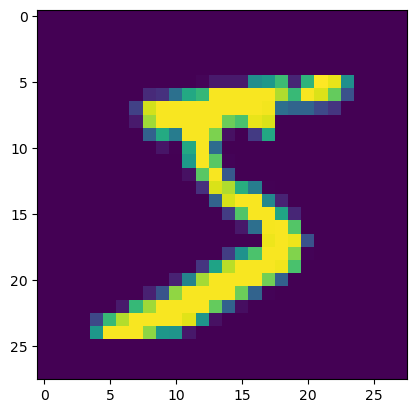

In [39]:
plt.imshow(X_train[0])

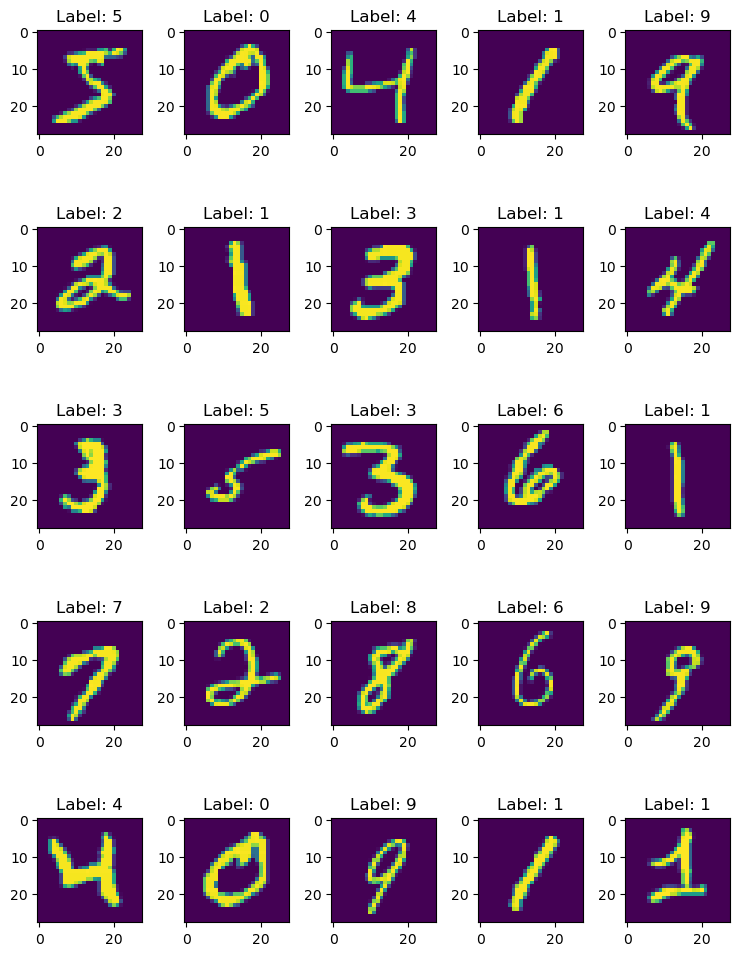

In [40]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [41]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [42]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [43]:
X_train /= 255
X_test /= 255

In [68]:
# 6. Preprocess class labels
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [70]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [71]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


In [72]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\jacks\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
# 9. Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8806 - loss: 0.3838
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9740 - loss: 0.0885
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9797 - loss: 0.0647
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9835 - loss: 0.0527
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9852 - loss: 0.0482
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9878 - loss: 0.0399
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9894 - loss: 0.0356
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9898 - loss: 0.0326
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9904 - loss: 0.0330
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9912 - loss: 0.0273


In [74]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9916 - loss: 0.0302


In [75]:
#predict first 4 images in the test set
model.predict(X_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[2.27581368e-16, 2.30551134e-11, 8.74260907e-12, 5.60383018e-10,
        5.60148987e-14, 4.57807654e-14, 8.54861333e-19, 1.00000000e+00,
        5.34087423e-13, 4.72027584e-10],
       [3.26524363e-11, 1.70202483e-07, 9.99999881e-01, 1.16682120e-12,
        4.19664269e-14, 7.98254262e-19, 1.97309200e-11, 3.50386191e-12,
        3.29730716e-14, 3.69259977e-17],
       [4.28021420e-12, 9.99999166e-01, 1.37275151e-08, 3.18818322e-12,
        6.96218549e-08, 8.34678193e-09, 1.38216460e-09, 7.35666617e-07,
        3.88245125e-09, 3.01992542e-10],
       [1.00000000e+00, 2.05790181e-12, 3.66400764e-11, 8.14398191e-14,
        1.72702807e-11, 2.17220577e-12, 3.18228714e-08, 1.37594085e-11,
        1.96592159e-10, 1.21903529e-10]], dtype=float32)

In [76]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([1., 1., 1., 1.], dtype=float32)

In [77]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [78]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[ 976    0    1    0    0    0    1    1    1    0]
 [   0 1128    0    0    0    2    1    3    1    0]
 [   2    0 1024    0    0    0    0    6    0    0]
 [   0    0    0 1007    0    2    0    0    1    0]
 [   0    0    1    0  976    0    2    0    1    2]
 [   1    0    0    5    0  883    2    0    1    0]
 [   3    2    0    0    2    2  948    0    1    0]
 [   0    2    6    1    0    0    0 1018    1    0]
 [   3    0    2    1    0    0    0    1  967    0]
 [   2    0    0    4    3    4    0    4    3  989]]


In [225]:
path = r'C:\Users\jacks\Downloads'
path

'C:\\Users\\jacks\\Downloads'

In [226]:
img = Image.open(os.path.join(path,'0.jpg')) 
print(img.format)
print(img.size)
print(img.mode)

JPEG
(1231, 1217)
L


In [227]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [228]:
testimg = asarray(img2)

In [229]:
print(testimg.shape)

(28, 28)


In [230]:
testimg = testimg.reshape(1, 28, 28, 1)

In [231]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
9


In [232]:
img = Image.open(os.path.join(path,'1.jpg')) 
print(img.format)
print(img.size)
print(img.mode)

JPEG
(980, 986)
L


In [233]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [234]:
testimg = asarray(img2)

In [235]:
print(testimg.shape)

(28, 28)


In [236]:
testimg = testimg.reshape(1, 28, 28, 1)

In [237]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
8


In [238]:
img = Image.open(os.path.join(path,'2.jpg')) 
print(img.format)
print(img.size)
print(img.mode)

JPEG
(3045, 3045)
L


In [239]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [240]:
testimg = asarray(img2)

In [241]:
print(testimg.shape)

(28, 28)


In [242]:
testimg = testimg.reshape(1, 28, 28, 1)

In [243]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
8


In [244]:
img = Image.open(os.path.join(path,'3.jpg')) 
print(img.format)
print(img.size)
print(img.mode)

JPEG
(887, 887)
L


In [245]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [246]:
testimg = asarray(img2)

In [247]:
print(testimg.shape)

(28, 28)


In [248]:
testimg = testimg.reshape(1, 28, 28, 1)

In [249]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
8


In [250]:
img = Image.open(os.path.join(path,'4.jpg')) 
print(img.format)
print(img.size)
print(img.mode)

JPEG
(845, 845)
L


In [251]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [252]:
testimg = asarray(img2)

In [253]:
print(testimg.shape)

(28, 28)


In [254]:
testimg = testimg.reshape(1, 28, 28, 1)

In [255]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
8


In [256]:
img = Image.open(os.path.join(path,'5.jpg')) 
print(img.format)
print(img.size)
print(img.mode)

JPEG
(1095, 1094)
L


In [257]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [258]:
testimg = asarray(img2)

In [259]:
print(testimg.shape)

(28, 28)


In [260]:
testimg = testimg.reshape(1, 28, 28, 1)

In [261]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
5


In [262]:
img = Image.open(os.path.join(path,'6.jpg')) 
print(img.format)
print(img.size)
print(img.mode)

JPEG
(1151, 1151)
L


In [263]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [264]:
testimg = asarray(img2)

In [265]:
print(testimg.shape)

(28, 28)


In [266]:
testimg = testimg.reshape(1, 28, 28, 1)

In [267]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6


In [268]:
img = Image.open(os.path.join(path,'7.jpg')) 
print(img.format)
print(img.size)
print(img.mode)

JPEG
(1145, 1145)
L


In [269]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [270]:
testimg = asarray(img2)

In [271]:
print(testimg.shape)

(28, 28)


In [272]:
testimg = testimg.reshape(1, 28, 28, 1)

In [273]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3


In [274]:
img = Image.open(os.path.join(path,'8.jpg')) 
print(img.format)
print(img.size)
print(img.mode)

JPEG
(1023, 1023)
L


In [275]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [276]:
testimg = asarray(img2)

In [277]:
print(testimg.shape)

(28, 28)


In [278]:
testimg = testimg.reshape(1, 28, 28, 1)

In [279]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
8


In [280]:
img = Image.open(os.path.join(path,'9.jpg')) 
print(img.format)
print(img.size)
print(img.mode)

JPEG
(1042, 1042)
L


In [281]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [282]:
testimg = asarray(img2)

In [283]:
print(testimg.shape)

(28, 28)


In [284]:
testimg = testimg.reshape(1, 28, 28, 1)

In [285]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
8


### The model recognized only 3 of my 10 digits. It thought most of my hand-written digits were 8s.